# Exploratory Data Analysis

In [57]:
import missingno as msno
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [58]:
df = pd.read_csv('../data/raw/train.csv')
df.head()

,company_id,payment_note_date,payment_note_amount,financials_date,financials_date-1,financials_date-2,financials_date-3,financials_date-4,revenue,revenue-1,...,profit_margin-1,profit_margin-2,profit_margin-3,profit_margin-4,cash_ratio,cash_ratio-1,cash_ratio-2,cash_ratio-3,cash_ratio-4,Rating
0,1,2014/06/12,6487.0,Aug-18,Aug-17,Aug-16,Aug-15,Aug-14,5677,8673.0,...,13.6,10.3,16.8,-5.4,395.5,232.4,184.7,236.4,148.1,AAA
1,2,NaN,0.0,Dec-17,Dec-16,Dec-15,Dec-14,Dec-13,10617,8266.0,...,9.1,15.9,23.1,16.8,229.0,280.7,296.1,234.0,213.0,AA
2,3,NaN,NaN,Dec-17,NaN,NaN,NaN,NaN,7201,NaN,...,NaN,NaN,NaN,NaN,128.1,NaN,NaN,NaN,NaN,AA
3,4,NaN,NaN,Apr-18,Apr-17,Apr-16,Apr-15,Apr-14,22629,20668.0,...,0.2,2.9,0.1,1.9,97.8,89.2,82.2,72.4,92.9,A
4,5,2015/05/03,85539.0,Jul-18,Jul-17,Jul-16,Jul-15,Jul-14,10221,8358.0,...,14.6,-0.4,-0.6,9.7,159.9,183.1,112.5,215.5,134.3,AA


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10964 entries, 0 to 10963
Data columns (total 59 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   company_id                          10964 non-null  int64  
 1   payment_note_date                   1156 non-null   object 
 2   payment_note_amount                 3814 non-null   float64
 3   financials_date                     10964 non-null  object 
 4   financials_date-1                   10709 non-null  object 
 5   financials_date-2                   10186 non-null  object 
 6   financials_date-3                   9613 non-null   object 
 7   financials_date-4                   9007 non-null   object 
 8   revenue                             10964 non-null  int64  
 9   revenue-1                           10709 non-null  float64
 10  revenue-2                           10186 non-null  float64
 11  revenue-3                           9613 

In [60]:
df.describe()

,company_id,payment_note_amount,revenue,revenue-1,revenue-2,revenue-3,revenue-4,net_sales,net_sales-1,net_sales-2,...,profit_margin,profit_margin-1,profit_margin-2,profit_margin-3,profit_margin-4,cash_ratio,cash_ratio-1,cash_ratio-2,cash_ratio-3,cash_ratio-4
count,10964.00000,3.814000e+03,10964.000000,10709.000000,1.018600e+04,9.613000e+03,9006.000000,10964.000000,10709.000000,1.018600e+04,...,10964.000000,10709.000000,10186.000000,9613.000000,9007.000000,10964.000000,10709.000000,10186.000000,9613.000000,9007.000000
mean,5482.50000,2.427674e+04,15453.165451,14059.992343,1.326780e+04,1.213846e+04,11299.010549,15233.147574,13840.274069,1.306950e+04,...,6.538718,11.386208,8.447919,12.017320,0.841779,192.600228,209.971996,211.286423,214.669500,205.277584
std,3165.17851,1.655236e+05,14959.186238,15904.640347,2.349844e+04,2.171518e+04,13093.612492,14801.777783,15671.801378,2.330869e+04,...,223.550514,216.297128,135.787404,493.913462,817.969037,1179.225755,1122.474966,808.279083,840.634975,641.051747
min,1.00000,0.000000e+00,-203.000000,0.000000,-4.090000e+02,-1.000000e+01,0.000000,0.000000,0.000000,-4.090000e+02,...,-20128.600000,-1540.900000,-8100.000000,-2092.300000,-73600.000000,-96500.000000,-182.600000,-1700.000000,-583.300000,-4100.000000
25%,2741.75000,0.000000e+00,7049.500000,6238.000000,5.566000e+03,4.922000e+03,4495.000000,6924.750000,6108.000000,5.469250e+03,...,1.600000,1.700000,2.000000,1.400000,1.000000,107.000000,107.500000,107.700000,106.400000,104.500000
50%,5482.50000,0.000000e+00,10853.000000,9839.000000,9.102500e+03,8.186000e+03,7800.500000,10705.000000,9658.000000,8.966500e+03,...,5.600000,5.900000,5.900000,5.200000,4.600000,143.850000,145.700000,148.000000,146.700000,145.200000
75%,8223.25000,8.000000e+02,19103.250000,17242.000000,1.603200e+04,1.476600e+04,14042.250000,18790.250000,16936.000000,1.577700e+04,...,11.300000,11.600000,11.600000,10.800000,10.300000,204.200000,206.500000,211.100000,212.300000,209.750000
max,10964.00000,7.607494e+06,368432.000000,703417.000000,1.705038e+06,1.492586e+06,282827.000000,365338.000000,703417.000000,1.705038e+06,...,4142.000000,21000.000000,9820.500000,47964.500000,20146.700000,46620.000000,78116.700000,48520.000000,61033.300000,39180.000000


In [61]:
df.isna().count()

company_id                            10964
payment_note_date                     10964
payment_note_amount                   10964
financials_date                       10964
financials_date-1                     10964
financials_date-2                     10964
financials_date-3                     10964
financials_date-4                     10964
revenue                               10964
revenue-1                             10964
revenue-2                             10964
revenue-3                             10964
revenue-4                             10964
net_sales                             10964
net_sales-1                           10964
net_sales-2                           10964
net_sales-3                           10964
net_sales-4                           10964
profit_after_net_financial_items      10964
profit_after_net_financial_items-1    10964
profit_after_net_financial_items-2    10964
profit_after_net_financial_items-3    10964
profit_after_net_financial_items

In [62]:
## note that we have 5 categories and this is an imbalanced classification problem
df[['company_id', 'Rating']].groupby('Rating').count()

,company_id
Rating,
A,2114
AA,4623
AAA,2784
B,888
C,555


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10964 entries, 0 to 10963
Data columns (total 59 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   company_id                          10964 non-null  int64  
 1   payment_note_date                   1156 non-null   object 
 2   payment_note_amount                 3814 non-null   float64
 3   financials_date                     10964 non-null  object 
 4   financials_date-1                   10709 non-null  object 
 5   financials_date-2                   10186 non-null  object 
 6   financials_date-3                   9613 non-null   object 
 7   financials_date-4                   9007 non-null   object 
 8   revenue                             10964 non-null  int64  
 9   revenue-1                           10709 non-null  float64
 10  revenue-2                           10186 non-null  float64
 11  revenue-3                           9613 

In [64]:
df.isna().sum()

company_id                               0
payment_note_date                     9808
payment_note_amount                   7150
financials_date                          0
financials_date-1                      255
financials_date-2                      778
financials_date-3                     1351
financials_date-4                     1957
revenue                                  0
revenue-1                              255
revenue-2                              778
revenue-3                             1351
revenue-4                             1958
net_sales                                0
net_sales-1                            255
net_sales-2                            778
net_sales-3                           1351
net_sales-4                           1958
profit_after_net_financial_items         0
profit_after_net_financial_items-1     255
profit_after_net_financial_items-2     778
profit_after_net_financial_items-3    1351
profit_after_net_financial_items-4    1958
profit     

<AxesSubplot:>

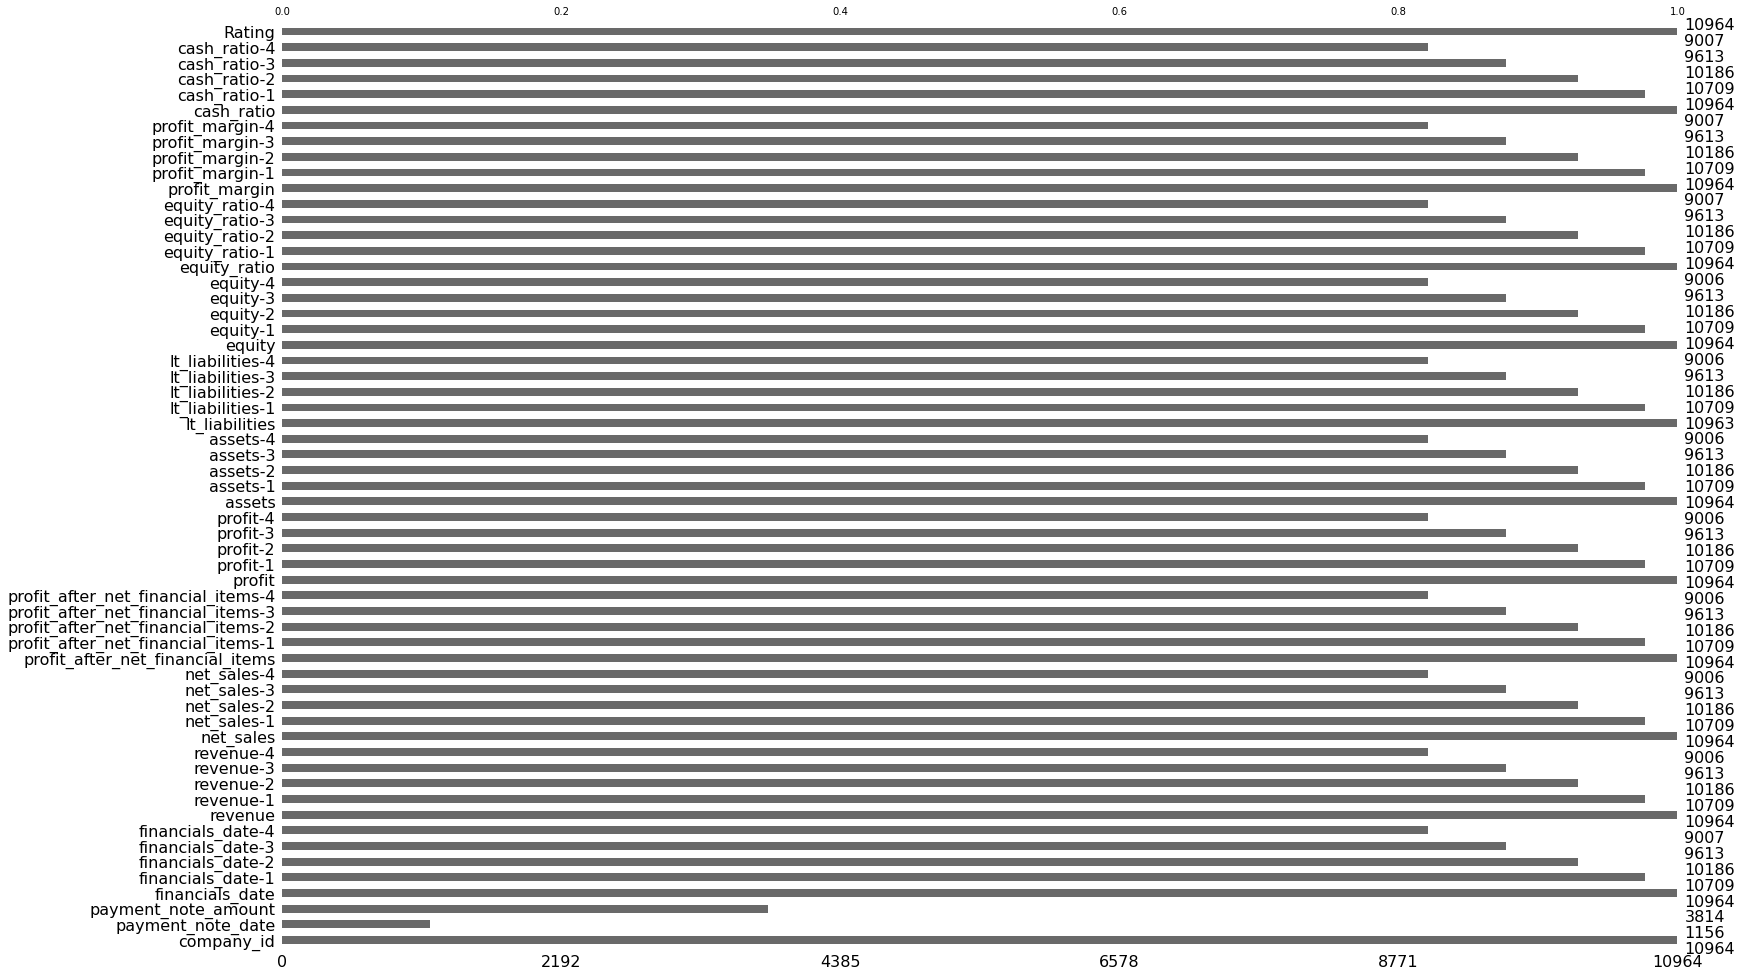

In [65]:
msno.bar(df)

<AxesSubplot:>

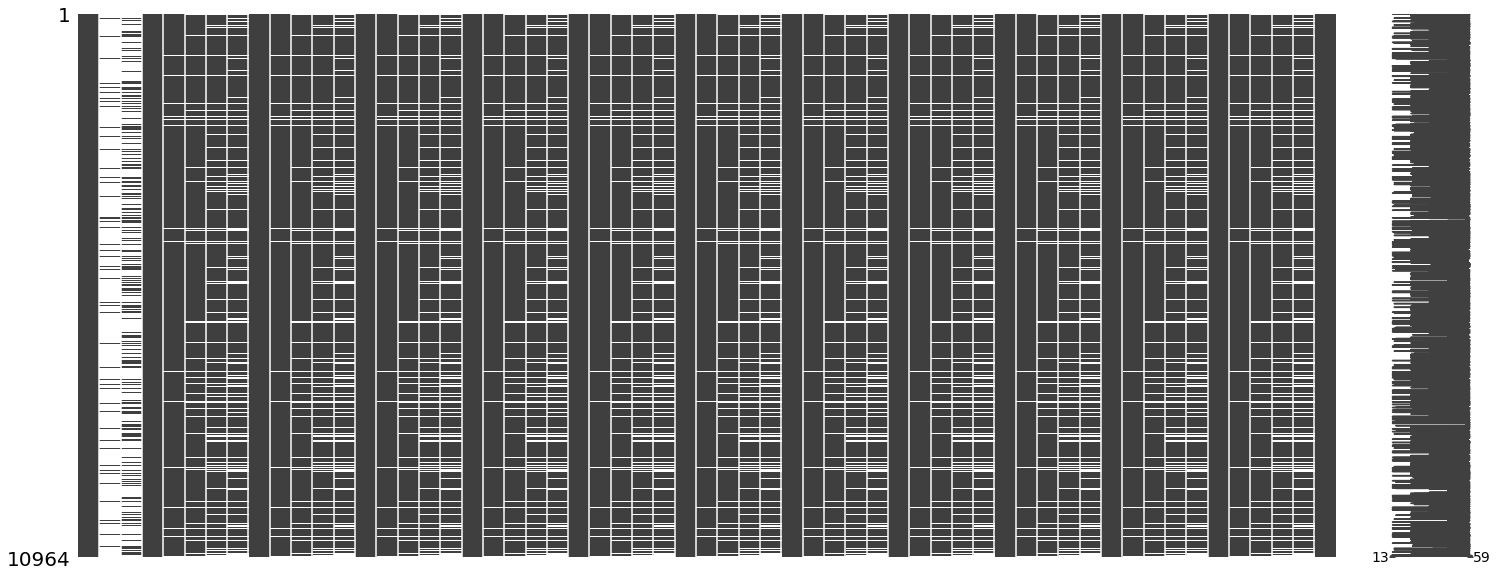

In [66]:
msno.matrix(df)

In [67]:
msno.heatmap(df)

<AxesSubplot:>

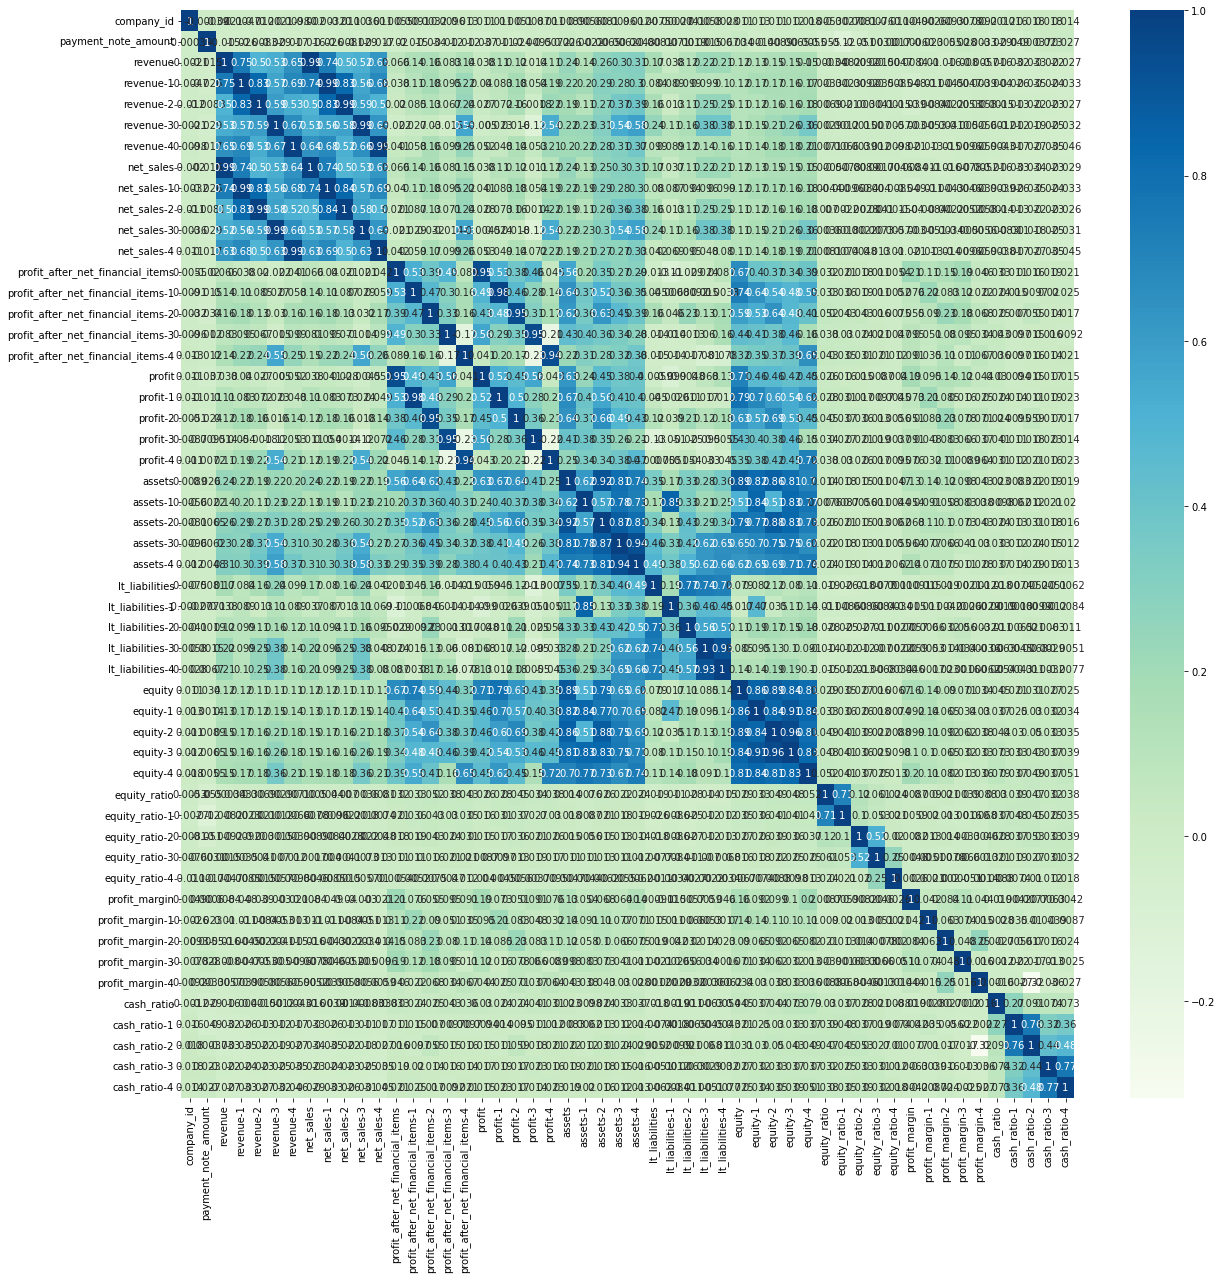

In [ ]:
plt.figure(figsize=(20,20))
correlation = df.corr()
sns.heatmap(correlation, cmap="GnBu", annot=True)
plt.show()